In [2]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [3]:
R1 = np.transpose(np.loadtxt('Run1.csv', delimiter = ','))
R2 = np.transpose(np.loadtxt('Run2.csv', delimiter = ','))
R3 = np.transpose(np.loadtxt('Run3.csv', delimiter = ','))

# Raw data plot

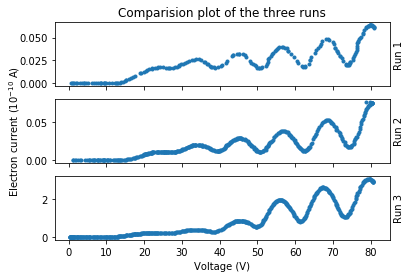

In [18]:
f, ax = plt.subplots(3, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', top = False, bottom = False, left = False, right = False)
plt.grid(False)

ax[0].plot(R1[0],R1[1], '.')
ax[0].yaxis.set_label_position("right")
ax[1].plot(R2[0],R2[1], '.')
ax[1].yaxis.set_label_position("right")
ax[2].plot(R3[0],R3[1], '.')
ax[2].yaxis.set_label_position("right")
ax[0].set_ylabel('Run 1')
ax[1].set_ylabel('Run 2')
ax[2].set_ylabel('Run 3')

plt.xlabel('Voltage (V)')
plt.ylabel('Electron current (10$^{-10}$ A)', labelpad = 10)
plt.title('Comparision plot of the three runs')

plt.show()

In [20]:
def prime(para):
    degree = len(para)-1
    cof=[]
    for i in range(degree):
        cof.append(para[i]*degree)
        degree-=1
    return cof

# Data set 1 fitting
# First peak & trough

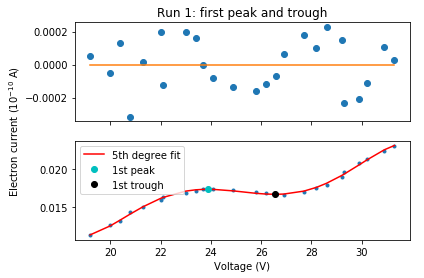

In [27]:
#seems hard to fit a quadratic function, so I tried higher degrees
x, y = R1[0][40:65], R1[1][40:65]
para = np.polyfit(x,y,5)

func = lambda x: (prime(para)[0]*x**4 + prime(para)[1]*x**3 + prime(para)[2]*x**2 + prime(para)[3]*x**1 + prime(para)[4])
peak1 = fsolve(func, 24)
trough1 = fsolve(func, 27)

fit = np.polyval(para, x)

f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', top = False, bottom = False, left = False, right = False)
plt.grid(False)
plt.ylabel('Electron current (10$^{-10}$ A)', labelpad = 30)
plt.title('Run 1: first peak and trough')

ax[1].plot(x, y, '.')
ax[1].plot(x, fit,'r', label = "5th degree fit")
ax[1].plot(peak1, np.polyval(para, peak1), 'co', label = '1st peak')
ax[1].plot(trough1, np.polyval(para, trough1), 'ko', label = '1st trough')

ax[0].plot(x, fit-y, 'o')
ax[0].plot(x, [0]*len(x))

ax[1].set(xlabel='Voltage (V)')
ax[1].legend()
plt.show()

# Second peak

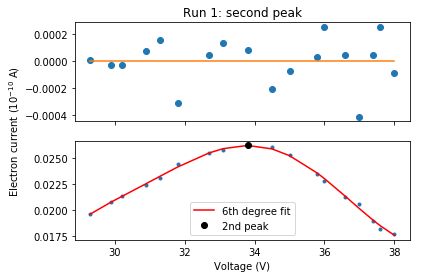

In [28]:
x, y = R1[0][60:78], R1[1][60:78]
para = np.polyfit(x,y,6)

func = lambda x: (prime(para)[0]*x**5 + prime(para)[1]*x**4 + prime(para)[2]*x**3 + prime(para)[3]*x**2 + prime(para)[4] * x + prime(para)[5])
peak2 = fsolve(func, 34)

fit = np.polyval(para, x)

f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', top = False, bottom = False, left = False, right = False)
plt.grid(False)
plt.ylabel('Electron current (10$^{-10}$ A)', labelpad = 30)
plt.title('Run 1: second peak')

ax[1].plot(x, y, '.')
ax[1].plot(x, fit,'r', label = "6th degree fit")
ax[1].plot(peak2, np.polyval(para, peak2), 'ko', label = '2nd peak')
ax[1].legend()

ax[0].plot(x, fit-y, 'o')
ax[0].plot(x, [0]*len(x))

ax[1].set(xlabel='Voltage (V)')
plt.show()

# Second trough

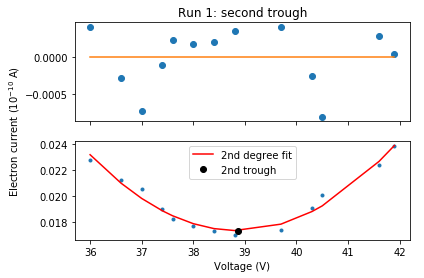

In [29]:
x, y = R1[0][72:85], R1[1][72:85]
para = np.polyfit(x,y,2)

func = lambda x: (prime(para)[0]*x + prime(para)[1])
trough2 = fsolve(func, 39)

fit = np.polyval(para, x)

f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', top = False, bottom = False, left = False, right = False)
plt.grid(False)
plt.ylabel('Electron current (10$^{-10}$ A)', labelpad = 30)
plt.title('Run 1: second trough')

ax[1].plot(x, y, '.')
ax[1].plot(x, fit,'r', label = "2nd degree fit")
ax[1].plot(trough2, np.polyval(para, trough2), 'ko', label = '2nd trough')
ax[1].legend()

ax[0].plot(x, fit-y, 'o')
ax[0].plot(x, [0]*len(x))

ax[1].set(xlabel='Voltage (V)')
plt.show()

# Third peak

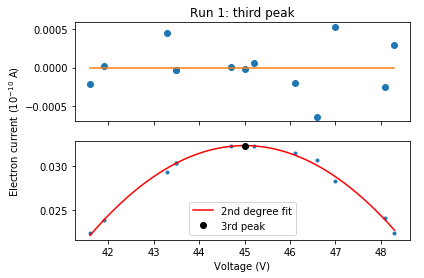

In [30]:
x, y = R1[0][83:96], R1[1][83:96]
para = np.polyfit(x,y,2)

func = lambda x: (prime(para)[0]*x + prime(para)[1])
peak3 = fsolve(func, 45)

fit = np.polyval(para, x)

f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', top = False, bottom = False, left = False, right = False)
plt.grid(False)
plt.ylabel('Electron current (10$^{-10}$ A)', labelpad = 30)
plt.title('Run 1: third peak')

ax[1].plot(x, y, '.')
ax[1].plot(np.linspace(x[0],x[-1]), np.polyval(para, np.linspace(x[0],x[-1])),'r', label = "2nd degree fit")
ax[1].plot(peak3, np.polyval(para, peak3), 'ko', label = '3rd peak')
ax[1].legend()

ax[0].plot(x, fit-y, 'o')
ax[0].plot(x, [0]*len(x))

ax[1].set(xlabel='Voltage (V)')
plt.show()

# Third trough

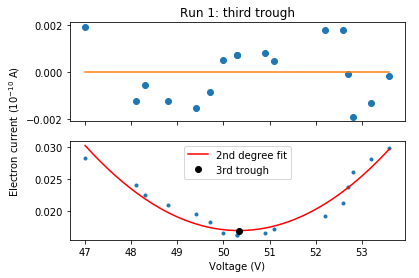

In [42]:
x, y = R1[0][93:110], R1[1][93:110]
para = np.polyfit(x,y,2)

func = lambda x: (prime(para)[0]*x + prime(para)[1])
trough3 = fsolve(func, 50)

fit = np.polyval(para, x)

f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', top = False, bottom = False, left = False, right = False)
plt.grid(False)
plt.ylabel('Electron current (10$^{-10}$ A)', labelpad = 25)
plt.title('Run 1: third trough')

ax[1].plot(x, y, '.')
ax[1].plot(np.linspace(x[0],x[-1]), np.polyval(para, np.linspace(x[0],x[-1])),'r', label = "2nd degree fit")
ax[1].plot(trough3, np.polyval(para, trough3), 'ko', label = '3rd trough')
ax[1].legend()

ax[0].plot(x, fit-y, 'o')
ax[0].plot(x, [0]*len(x))

ax[1].set(xlabel='Voltage (V)')
plt.show()

# Fourth peak

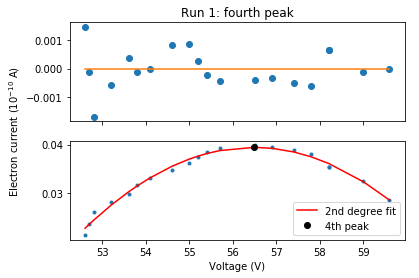

In [35]:
x, y = R1[0][105:125], R1[1][105:125]
para = np.polyfit(x,y,2)

func = lambda x: (prime(para)[0]*x + prime(para)[1])
peak4 = fsolve(func, 55)

fit = np.polyval(para, x)

f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', top = False, bottom = False, left = False, right = False)
plt.grid(False)
plt.ylabel('Electron current (10$^{-10}$ A)', labelpad = 25)
plt.title('Run 1: fourth peak')

ax[1].plot(x, y, '.')
ax[1].plot(x, fit,'r', label = "2nd degree fit")
ax[1].plot(peak4, np.polyval(para, peak4), 'ko', label = '4th peak')
ax[1].legend()

ax[0].plot(x, fit-y, 'o')
ax[0].plot(x, [0]*len(x))

ax[1].set(xlabel='Voltage (V)')
plt.show()

# Fourth trough

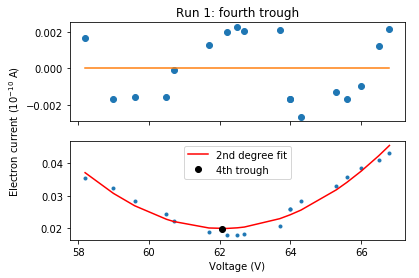

In [37]:
x, y = R1[0][122:140], R1[1][122:140]
para = np.polyfit(x,y,2)

func = lambda x: (prime(para)[0]*x + prime(para)[1])
trough4 = fsolve(func, 50)

fit = np.polyval(para, x)

f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', top = False, bottom = False, left = False, right = False)
plt.grid(False)
plt.ylabel('Electron current (10$^{-10}$ A)', labelpad = 25)
plt.title('Run 1: fourth trough')

ax[1].plot(x, y, '.')
ax[1].plot(x, fit,'r', label = "2nd degree fit")
ax[1].plot(trough4, np.polyval(para, trough4), 'ko', label = '4th trough')
ax[1].legend()

ax[0].plot(x, fit-y, 'o')
ax[0].plot(x, [0]*len(x))

ax[1].set(xlabel='Voltage (V)')
plt.show()

#  Fifth peak

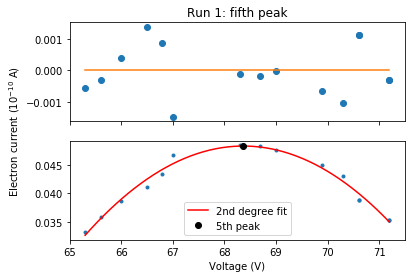

In [40]:
x, y = R1[0][135:150], R1[1][135:150]
para = np.polyfit(x,y,2)

func = lambda x: (prime(para)[0]*x + prime(para)[1])
peak5 = fsolve(func, 55)

fit = np.polyval(para, x)

f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', top = False, bottom = False, left = False, right = False)
plt.grid(False)
plt.ylabel('Electron current (10$^{-10}$ A)', labelpad = 25)
plt.title('Run 1: fifth peak')

ax[1].plot(x, y, '.')
ax[1].plot(np.linspace(x[0],x[-1]), np.polyval(para, np.linspace(x[0],x[-1])), 'r', label = "2nd degree fit")
ax[1].plot(peak5, np.polyval(para, peak5), 'ko', label = '5th peak')
ax[1].legend()

ax[0].plot(x, fit-y, 'o')
ax[0].plot(x, [0]*len(x))

ax[1].set(xlabel='Voltage (V)')
plt.show()

# Fifth trough

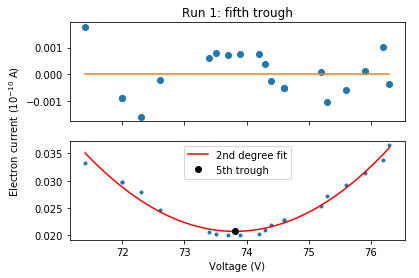

In [44]:
x, y = R1[0][150:170], R1[1][150:170]
para = np.polyfit(x,y,2)

func = lambda x: (prime(para)[0]*x + prime(para)[1])
trough5 = fsolve(func, 50)

fit = np.polyval(para, x)

f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', top = False, bottom = False, left = False, right = False)
plt.grid(False)
plt.ylabel('Electron current (10$^{-10}$ A)', labelpad = 25)
plt.title('Run 1: fifth trough')

ax[1].plot(x, y, '.')
ax[1].plot(np.linspace(x[0],x[-1]), np.polyval(para,np.linspace(x[0],x[-1])),'r', label = "2nd degree fit")
ax[1].plot(trough5, np.polyval(para, trough5), 'ko', label = '5th trough')
ax[1].legend()

ax[0].plot(x, fit-y, 'o')
ax[0].plot(x, [0]*len(x))

ax[1].set(xlabel='Voltage (V)')
plt.show()

# Sixth peak

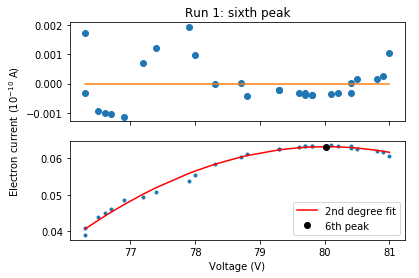

In [45]:
x, y = R1[0][170:230], R1[1][170:230]
para = np.polyfit(x,y,2)

func = lambda x: (prime(para)[0]*x + prime(para)[1])
peak6 = fsolve(func, 55)

fit = np.polyval(para, x)

f, ax = plt.subplots(2, sharex = True)
f.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', top = False, bottom = False, left = False, right = False)
plt.grid(False)
plt.ylabel('Electron current (10$^{-10}$ A)', labelpad = 25)
plt.title('Run 1: sixth peak')

ax[1].plot(x, y, '.')
ax[1].plot(x, fit,'r', label = "2nd degree fit")
ax[1].plot(peak6, np.polyval(para, peak6), 'ko', label = '6th peak')
ax[1].legend()

ax[0].plot(x, fit-y, 'o')
ax[0].plot(x, [0]*len(x))

ax[1].set(xlabel='Voltage (V)')
plt.show()

In [47]:
peaks = [peak1,peak2,peak3,peak4,peak5,peak6]
troughs = [trough1,trough2,trough3,trough4,trough5]
print(peaks)
print(troughs)
pdiff = []
for i in range(len(peaks) - 1):
    pdiff.append(peaks[i+1][0] - peaks[i][0])
print('peak to peak difference: ',pdiff)

tdiff = []
for i in range(len(troughs) - 1):
    tdiff.append(troughs[i+1][0] - troughs[i][0])
print('trough to trough difference: ',tdiff)

[array([23.88356487]), array([33.80359271]), array([44.99962243]), array([56.47326527]), array([68.36825241]), array([80.02526584])]
[array([26.55711616]), array([38.86517101]), array([50.33413721]), array([62.07415152]), array([73.80911455])]
peak to peak difference:  [9.920027842619334, 11.196029712812951, 11.473642845939537, 11.894987134868188, 11.657013428380424]
trough to trough difference:  [12.308054853467727, 11.468966197929312, 11.740014304174707, 11.734963037275229]


11.615384615384617 0.16641005886756874
11.64 0.17888543819998318
11.659633027522936 0.08620436566990362
11.6 0.2
11.6 0.2
11.66 0.09


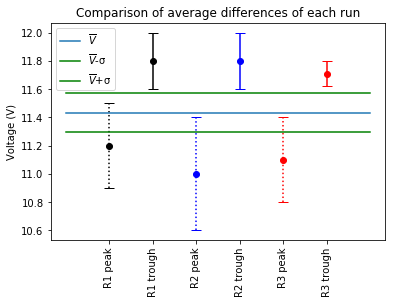

In [61]:
p1 = np.mean(pdiff)
p1err = np.std(pdiff)/np.sqrt(len(pdiff))
#print(p1,p1err)
t1 = np.mean(tdiff)
t1err = np.std(tdiff)/np.sqrt(len(tdiff))
#print(t1,t1err)

# calculating the weighted mean of the differences for each run
p1 = 11.2
p1err = 0.3
t1 = 11.8
t1err = 0.2

p2 = 11.0 
p2err = 0.4
t2 = 11.8
t2err = 0.2

p3 = 11.1
p3err = 0.3
t3 = 11.71
t3err = 0.09

p1w = 1/(p1err**2)
t1w = 1/(t1err**2)
p2w = 1/(p2err**2)
t2w = 1/(t2err**2)
p3w = 1/(p3err**2)
t3w = 1/(t3err**2)
r1 = (p1*p1w + t1*t1w)/(p1w+t1w)
r2 = (p2*p2w + t2*t2w)/(p2w+t2w)
r3 = (p3*p3w + t3*t3w)/(p3w+t3w)
er1 = np.sqrt(1/(p1w+t1w))
er2 = np.sqrt(1/(p2w+t2w))
er3 = np.sqrt(1/(p3w+t3w))
print(r1,er1)
print(r2,er2)
print(r3,er3)

r1 = 11.6
er1 = 0.2
r2 = 11.6 
er2 = 0.2
r3 = 11.66
er3 = 0.09
print(r1,er1)
print(r2,er2)
print(r3,er3)

#plot of the differences for each run
p1p = plt.errorbar(1, p1, yerr = p1err, fmt = 'ko', capsize = 5)
p1p[-1][0].set_linestyle(':')
plt.errorbar(2, t1, yerr = t1err, fmt = 'ko', capsize = 5)

p2p = plt.errorbar(3, p2, yerr = p2err, fmt = 'bo', capsize = 5)
p2p[-1][0].set_linestyle(':')
plt.errorbar(4, t2, yerr = t2err, fmt ='bo', capsize = 5)

p3p = plt.errorbar(5, p3, yerr = p3err, fmt = 'ro', capsize = 5)
p3p[-1][0].set_linestyle(':')
plt.errorbar(6, t3, yerr = t3err, fmt = 'ro', capsize = 5)

mean = np.mean([p1,p2,p3,t1,t2,t3])
plt.plot([0,7], [mean]*2, label = '$\overline{V}$')
plt.plot([0,7], [mean-(np.std([p1,p2,p3,t1,t2,t3])/np.sqrt(len([p1,p2,p3,t1,t2,t3])))]*2, 'g', label = '$\overline{V}$-σ')
plt.plot([0,7], [mean+(np.std([p1,p2,p3,t1,t2,t3])/np.sqrt(len([p1,p2,p3,t1,t2,t3])))]*2, 'g', label = '$\overline{V}$+σ')

plt.ylabel('Voltage (V)')
plt.xticks([1,2,3,4,5,6],['R1 peak', 'R1 trough', 'R2 peak', 'R2 trough', 'R3 peak', 'R3 trough'],rotation='vertical')
plt.title('Comparison of average differences of each run')
plt.legend()
plt.show()

In [80]:
print(z(4.18-4.14)*100/4.14)

0.966183574879228


In [78]:
print(0.04/4.18*100)

0.9569377990430623
